stochastic differential equations

$$
dx =sigma * dW - alfa * x * dt
$$
$$
dy = -alfa * y * dt + beta * x * dt
$$

where $W$ is a Wiener process, $sigma$ is the volatility, $alfa$ is the mean reversion rate, and $beta$ is the correlation between the two processes.

dW is a Wiener process, which is a random process with the following properties:

- The change in the value of the Wiener process during a time interval is normally distributed.
- The size of the change is proportional to the square root of the length of the time interval.
- The size of the change is independent of the past history of the process.
- The process has continuous sample paths (i.e., no breaks or jumps).
- The process has stationary, independent increments.
- The process has normally distributed increments.

compute the avarage of the two processes <xy> and the correlation between the two processes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [81]:
alfa = 1
beta = 1
sigma = 1
dt = 0.01
T = 10
N = int(T/dt)
t = np.linspace(0, T, N)

In [54]:
def dW(delta_t):
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))


In [84]:
# initialize the arrays containing the values of x and y
x = np.zeros(N)
y = np.zeros(N)
x[0] = 1
y[0] = 1

# calculate the value of x and y at each time step
for i in range(len(t)-1):
    x[i+1] = x[i] + sigma * dW(dt) - alfa * x[i] * dt
    y[i+1] = y[i] - alfa * y[i] * dt + beta * x[i]**2 * dt

the correlation between x and y is -0.3472759549028558


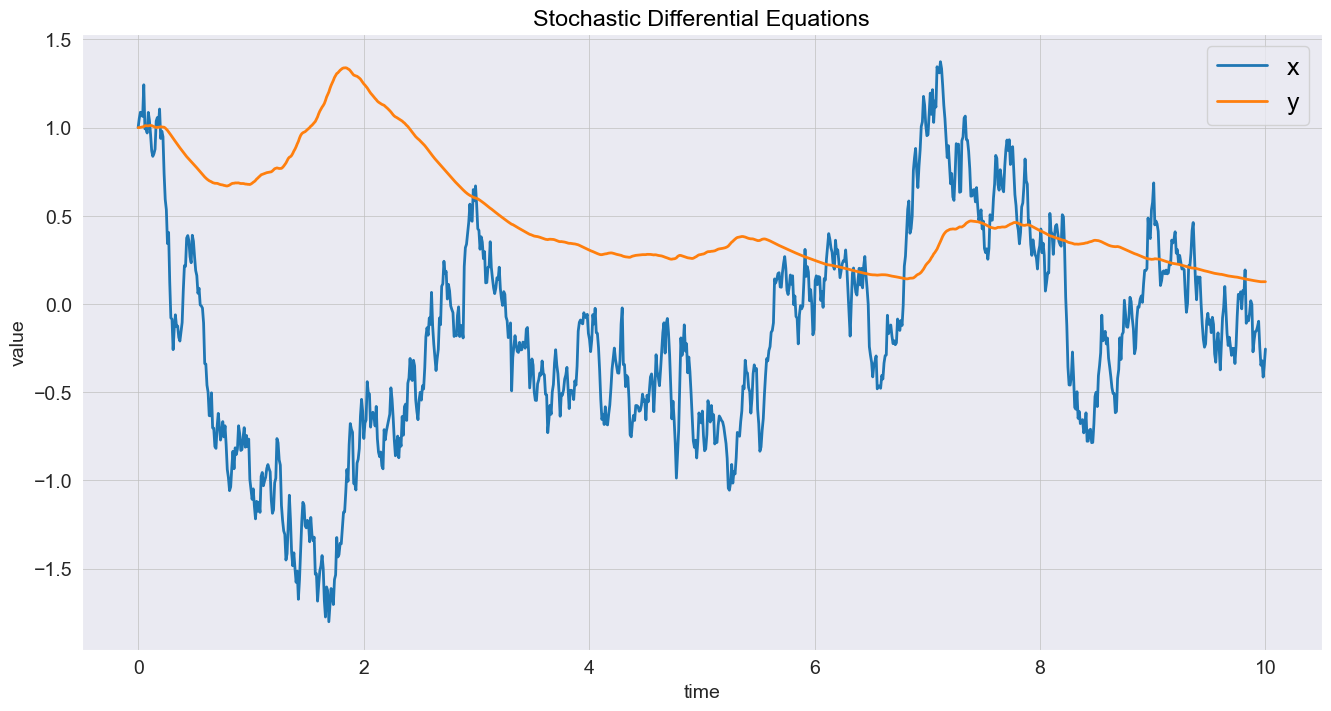

In [85]:
plt.rc('figure', figsize=(16, 8))
plt.rc('font', size=14)
plt.rc('lines', linewidth=2)
plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
plt.rc('text', color='k')

print('the correlation between x and y is', np.corrcoef(x, y)[0, 1])


plt.plot(t, x, label='x')
plt.plot(t, y, label='y')

plt.xlabel('time')
plt.ylabel('value')
plt.title('Stochastic Differential Equations')
plt.legend(loc='best', fontsize=18)

let's see ITO LEMMA for the stochastic differential equation

In [86]:
# correlation <xy>
print('the correlation between x and y is', np.corrcoef(x, y)[0, 1])

print(beta, sigma, alfa)


print(beta * sigma * sigma / (4 * alfa**2))
print('expected value of xy is', beta * sigma * sigma / (4 * alfa**2))


the correlation between x and y is -0.3472759549028558
1 1 1
0.25


(array([0.05857332, 0.        , 0.05857332, 0.02928666, 0.05857332,
        0.02928666, 0.02928666, 0.02928666, 0.08785997, 0.        ,
        0.05857332, 0.02928666, 0.02928666, 0.05857332, 0.05857332,
        0.02928666, 0.08785997, 0.05857332, 0.02928666, 0.        ,
        0.02928666, 0.02928666, 0.02928666, 0.14643329, 0.17571995,
        0.        , 0.08785997, 0.14643329, 0.05857332, 0.08785997,
        0.05857332, 0.02928666, 0.11714663, 0.11714663, 0.02928666,
        0.14643329, 0.11714663, 0.14643329, 0.26357992, 0.2050066 ,
        0.2050066 , 0.2050066 , 0.35143989, 0.26357992, 0.11714663,
        0.17571995, 0.26357992, 0.2050066 , 0.32215323, 0.23429326,
        0.14643329, 0.14643329, 0.02928666, 0.32215323, 0.17571995,
        0.38072655, 0.90788639, 1.31789959, 1.69862614, 1.69862614,
        1.23003962, 1.78648611, 2.54793921, 1.87434609, 2.25507264,
        1.43504622, 0.73216644, 0.82002641, 0.46858652, 0.61501981,
        0.41001321, 0.58573315, 0.41001321, 0.46

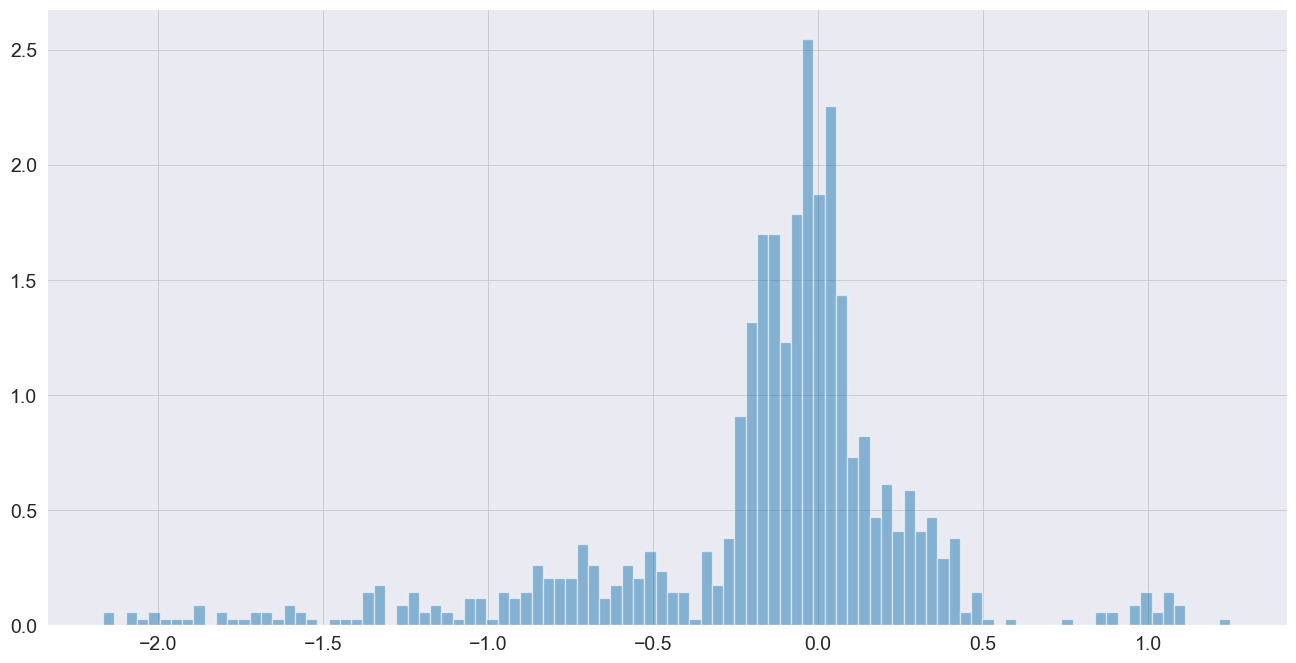

In [87]:
plt.hist(x * y, bins=100, density=True, alpha=0.5, label='x')

In [89]:
dxy = sigma * y * dW(dt) - 2 * alfa * x * y * dt + beta * x * x * dt
print('expected value of dxy is', np.mean(dxy))

expected value of dxy is 0.006711350791711737


(array([ 26.80849951,   1.16558694,   2.33117387,   0.        ,
          1.16558694,   1.16558694,   4.66234774,   3.49676081,
         20.98056483,  13.98704322,  87.41902014,  61.77610757,
        178.33480109,  99.07488949,  78.09432466,  55.94817289,
         44.29230354,  41.96112967,  26.80849951,  41.96112967,
         32.63643419,  29.13967338,  27.97408645,  22.14615177,
         18.64939096,  12.82145629,   9.32469548,  10.49028242,
          6.99352161,  11.65586935,   6.99352161,   8.15910855,
         11.65586935,  15.15263016,   3.49676081,   3.49676081,
          8.15910855,   9.32469548,   6.99352161,   8.15910855,
          3.49676081,   8.15910855,   5.82793468,   3.49676081,
          1.16558694,   3.49676081,   4.66234774,   3.49676081,
          3.49676081,   2.33117387,   0.        ,   2.33117387,
          1.16558694,   2.33117387,   5.82793468,   0.        ,
          2.33117387,   3.49676081,   2.33117387,   2.33117387,
          0.        ,   0.        ,   3.

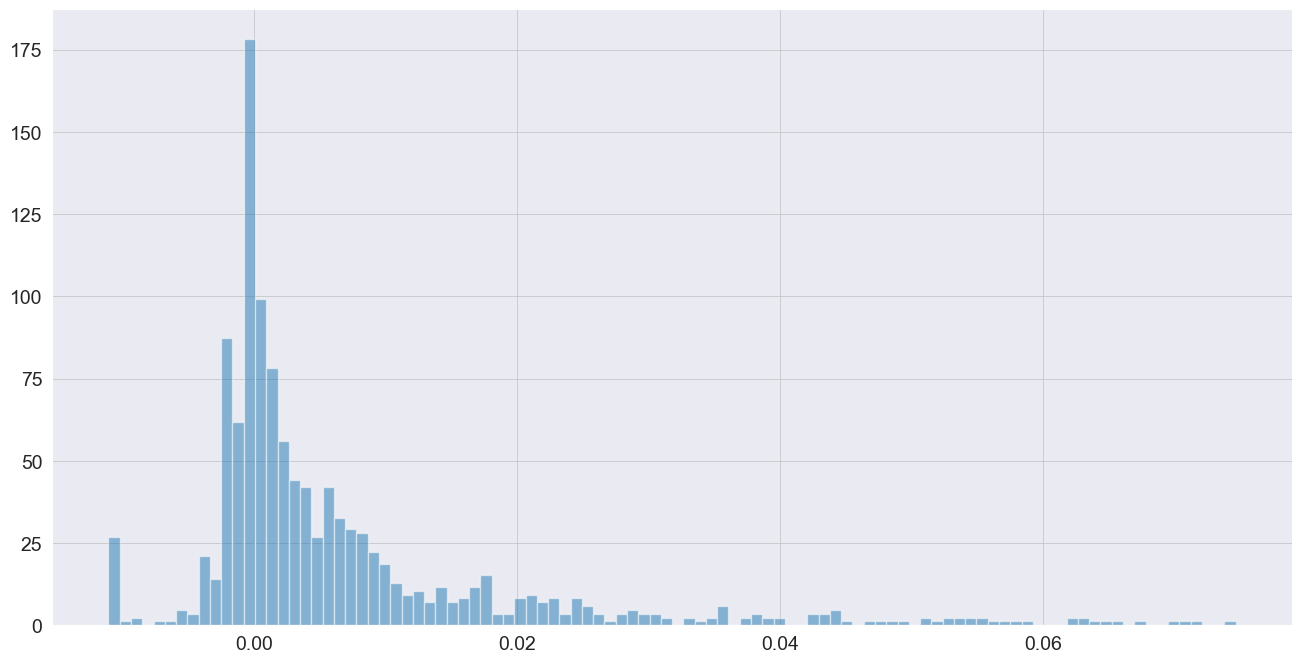

In [90]:
plt.hist(dxy, bins=100, density=True, alpha=0.5, label='x')








